# <center> Traitement du signal<center>

In [2]:
import matplotlib.pyplot as plt
from helper import *
from scipy import signal as sg
import numpy as np
import seaborn as sns
from scipy.fft import fftshift

In [21]:
lpfreq = 10 #frequence de coupure de base
mySignal = 1
# For filenaming purposes
name_output = "Graphs/Signal" +str(mySignal) +"/Output with coupure at " + str(lpfreq) + ".png"
name_raw = "Graphs/" + "/Raw_and_rectified" + str(mySignal) +".png"
file = "data/raw"+ str(mySignal) +".txt"

# Load the data and create time axes
signal = get_single_column_data(file)[:1800]
time = create_time_axes(signal)
size = np.size(signal)

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw1.txt'

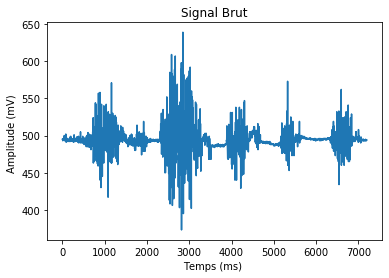

In [5]:
fig,ax1 = plt.subplots()
ax1.plot(time, signal)
ax1.set_title("Signal Brut")
ax1.set_xlabel("Temps (ms) ")
ax1.set_ylabel("Amplitude (mV) ")

plt.savefig("Raw Signal.jpeg",dpi=1200)

In [45]:
real = np.load("better2.npy")
time_real = np.linspace(0,7200,len(real))

<Figure size 432x288 with 0 Axes>

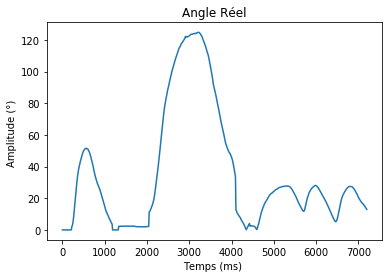

In [49]:
plt.clf()
fig,ax = plt.subplots()
plt.plot(time_real, real)
ax.set_title("Angle Réel")
ax.set_xlabel("Temps (ms) ")
ax.set_ylabel("Amplitude (°) ")

plt.plot()
plt.savefig("Graphs/Real angle.jpeg",dpi=1200)

# Definitions

Output = Filtered Signal                                                                                           
Raw = Raw Signal

# 1. Redressement

Le signal est d'abord recentré autour de 0 puis on prend la valuer absolue.
Il est nécessaire de faire cette etape sinon le filtrage d'apres ne sera pas efficafe car la valeur moyenne des pics du signal sont presque nulles.
Un filtre passe haut pourrait eventuellement être utilisé pour eliminer des bruits


In [21]:
rms = np.sqrt(np.mean(signal**2))
centered_signal = signal-rms

hp = sg.butter(1, 20, 'hp', fs=1000, output='sos')
#filtered = signal.sosfilt(hp, y1)
rectified_signal = np.abs(signal-rms)


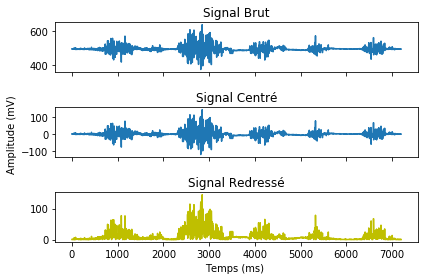

In [48]:
fig, (ax1, ax2,ax3) = plt.subplots(3,sharex=True)
ax1.plot(time, signal)
ax2.plot(time,centered_signal)
ax3.plot(time, rectified_signal,'y')
ax1.set_title("Signal Brut")
ax2.set_title("Signal Centré")
ax3.set_title("Signal Redressé")
ax3.set_xlabel("Temps (ms) ")
ax2.set_ylabel("Amplitude (mV) ")
fig.tight_layout()

plt.savefig(name_raw, dpi=1200)


# 2. Reconsitution d'enveloppe

Un filtre *passe bas* est utilisé de coupure à 20Hz

Il s'agit de filtre de Butterworth d'ordre 5

In [62]:
lp = sg.butter(5, lpfreq, 'lp', fs=1000, output='sos',)
output = sg.sosfilt(lp,rectified_signal)

### Diagramme de Bode du Filtre utilisé

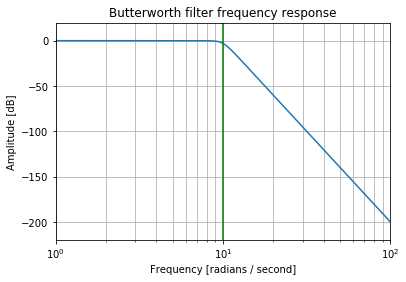

In [63]:
b, a = sg.butter(10, lpfreq, 'low', analog=True)
w, h = sg.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(lpfreq, color='green') # cutoff frequency

## Résultat Final

Text(0.5, 0, 'time')

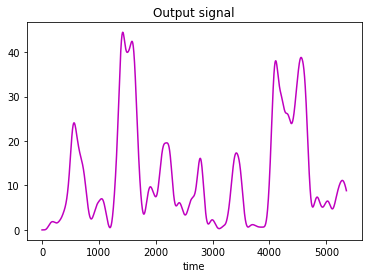

In [64]:
fig3, ax3 = plt.subplots()
ax3.plot(time, output,'m')
ax3.set_title("Output signal")
ax3.set_xlabel("time")
#plt.savefig(name_output)


## A comparer avec le signal brut

Text(0.5, 0, 'time')

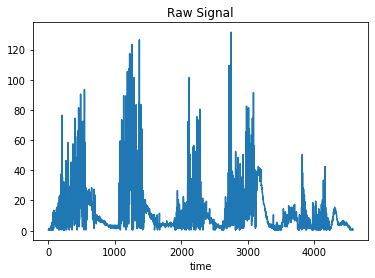

In [57]:
fig4, ax4 = plt.subplots()
ax4.plot(time, rectified_signal)
ax4.set_title("Raw Signal")
ax4.set_xlabel("time")

# 3. Influence des differents paramètres

## Frequence de coupure

On peut visualiser les differents resultats en utlisant des coupures differentes


Text(0.5, 0, 'time')

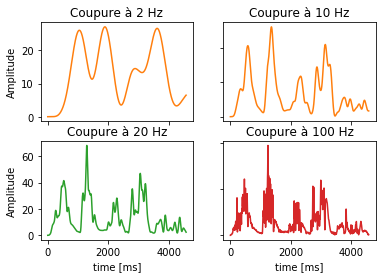

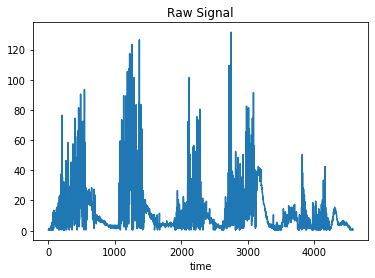

In [45]:
coupures = [2,10,20,100]
fig, axs = plt.subplots(2, 2)
output= np.zeros((4,size))
i=0
name = "Coupure à "

unite = " Hz"

for coup in coupures:
    lp = sg.butter(5, coup, 'lp', fs=1000, output='sos')
    output[i] = sg.sosfilt(lp,rectified_signal)
    i+=1

axs[0, 0].plot(time, output[0], 'tab:orange') 
axs[0, 0].set_title(name + str(coupures[0]) + unite)
axs[0, 1].plot(time, output[1], 'tab:orange')
axs[0, 1].set_title(name + str(coupures[1]) + unite)
axs[1, 0].plot(time, output[2], 'tab:green')
axs[1, 0].set_title(name + str(coupures[2]) + unite)
axs[1, 1].plot(time, output[3], 'tab:red')
axs[1, 1].set_title(name + str(coupures[3]) + unite)

for ax in axs.flat:
    ax.set(xlabel='time [ms]', ylabel='Amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig4, ax4 = plt.subplots()
ax4.plot(time, rectified_signal)
ax4.set_title("Raw Signal")
ax4.set_xlabel("time")

## Ordre du Filtre

Text(0.5, 0, 'time')

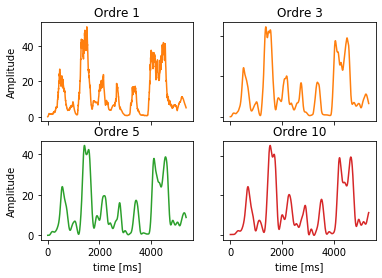

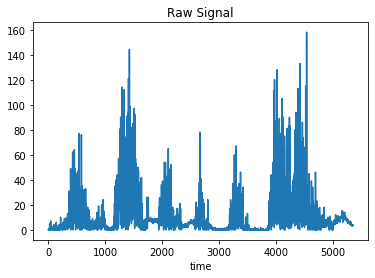

In [10]:
ordre = [1,3,5,10]
fig, axs = plt.subplots(2, 2)
output= np.zeros((4,size))
i=0
name = "Ordre "


for j in ordre:
    lp = sg.butter(j, lpfreq, 'lp', fs=1000, output='sos',)
    output[i] = sg.sosfilt(lp,rectified_signal)
    i+=1

axs[0, 0].plot(time, output[0], 'tab:orange') 
axs[0, 0].set_title(name + str(ordre[0]))
axs[0, 1].plot(time, output[1], 'tab:orange')
axs[0, 1].set_title(name + str(ordre[1]))
axs[1, 0].plot(time, output[2], 'tab:green')
axs[1, 0].set_title(name + str(ordre[2]))
axs[1, 1].plot(time, output[3], 'tab:red')
axs[1, 1].set_title(name + str(ordre[3]))

for ax in axs.flat:
    ax.set(xlabel='time [ms]', ylabel='Amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

    
fig4, ax4 = plt.subplots()
ax4.plot(time, rectified_signal)
ax4.set_title("Raw Signal")
ax4.set_xlabel("time")



## Utilisation d'un filtre de Chebychev

# Comparaison avec le signal filtre par le capteur

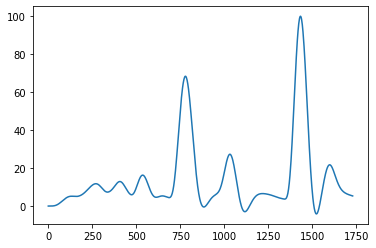

In [23]:
lpfreq = 100 #frequence de coupure de base
mySignal = 1 
file = "data/rnf"+ str(mySignal) +".txt"

# Load the data and create time axes
signal,filtered_signal = get_double_column_data(file)
time = create_time_axes(signal)
size = np.size(signal)

#Filter the input
filter = sg.butter(5, 15, 'lp', fs=1000, output='sos',)
output = sg.sosfilt(filter,np.abs(signal-np.sqrt(np.mean(signal**2))))

#Normalize
minf = np.min(filtered_signal)
output = 100*output/np.max(output)
filtered_signal = 100*(filtered_signal-minf)/np.max(filtered_signal-minf)
plt.plot(time,output)

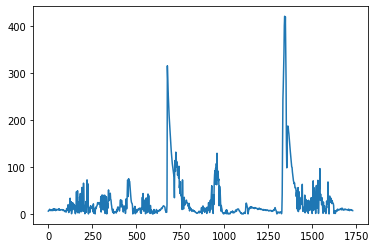

In [24]:
plt.plot(time,np.abs(signal-np.sqrt(np.mean(signal**2))))

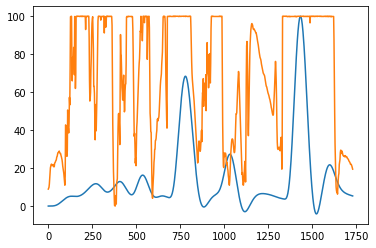

In [19]:
plt.plot(time,output)
plt.plot(time, filtered_signal)

# Moyenne Glissante

In [60]:
def moving_average(signal):
    Tw = 100
    output = np.zeros(len(signal))
    ym  = np.abs(np.mean(signal) - signal)
    return np.convolve(ym,np.ones(Tw)/Tw)

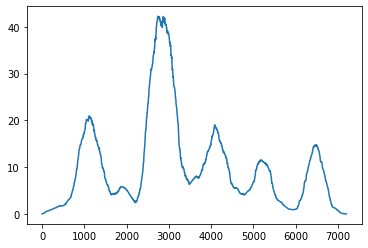

In [61]:
y2 = moving_average(signal)
plt.plot(np.linspace(0,7200,len(y2)) , y2)

# Metrics

Fidelite phi --> Difference des carres normalise par la plus grande distance possible
Fidelite phi' --> Distance max
Derivative_erro --> Pour minimiser les mouvements brusques

Les deux dependent enormement de la normalization

In [141]:
def fidelite(real,filt,func = True):
    max1 =np.sqrt((np.max(filt)-np.min(real))**2)
    
    max2 = np.sqrt((np.max(real)-np.min(filt))**2)
    print(max1)
    norm = max(max1,max2)
    phi = np.sqrt((real - filt)**2)
    if func:
        return 100*phi/norm
    return 100*np.sum(phi)/(norm*len(real))   
        

def fidelite_prime(real,filt):
    return np.max(np.abs(real-filt))

def derivative_error(input,order):
    out =  input
    for i in range(order):
        out = np.gradient(out)
        
    return np.sum(out**2)
